# MLP Test 6

Explorando `MLPClassifier` com `GridSearchCV`, utilizando o conunto de dados da **iris** para obter melhor combinação de **uma** camada oculta e utilizá-la em 30 rodadas de classificação.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix

## Carregando dados

In [2]:
irisDS = load_iris()
X, y = load_iris(return_X_y=True)

## Explorando `GridSearchCV`

In [3]:
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.3)

# Pré-processando dados
sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

# Instanciando GridSearch
grid_search = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid={'hidden_layer_sizes':[(neurons) for neurons in range(20, 155, 5)]},
    cv=7
).fit(
    X=X_train,
    y=y_train
)

resultsDF = pd.DataFrame(grid_search.cv_results_)

resultsDF.sort_values(by=['rank_test_score', 'param_hidden_layer_sizes'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
13,0.233896,0.002275,0.000757,0.000406,85,{'hidden_layer_sizes': 85},1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,0.866667,0.971429,0.048562,1
16,0.243193,0.004163,0.000753,0.000275,100,{'hidden_layer_sizes': 100},1.000000,1.000000,1.000000,1.000000,0.933333,1.000000,0.866667,0.971429,0.048562,1
5,0.206066,0.003276,0.000780,0.000291,45,{'hidden_layer_sizes': 45},0.933333,1.000000,1.000000,1.000000,0.933333,1.000000,0.866667,0.961905,0.048562,3
8,0.215049,0.001381,0.000580,0.000046,60,{'hidden_layer_sizes': 60},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
10,0.222516,0.004379,0.001018,0.000761,70,{'hidden_layer_sizes': 70},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
11,0.231879,0.010276,0.000667,0.000148,75,{'hidden_layer_sizes': 75},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
12,0.228250,0.003592,0.000790,0.000495,80,{'hidden_layer_sizes': 80},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
14,0.235902,0.003721,0.000842,0.000515,90,{'hidden_layer_sizes': 90},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
15,0.248586,0.014327,0.000679,0.000166,95,{'hidden_layer_sizes': 95},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3
17,0.250265,0.001873,0.001125,0.000773,105,{'hidden_layer_sizes': 105},1.000000,1.000000,1.000000,0.933333,0.933333,1.000000,0.866667,0.961905,0.048562,3


In [4]:
best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
grid_search.best_params_

{'hidden_layer_sizes': 85}

### Conclusão

Nesta rodada de `GridSearch`, houveram dois empatados em primeiro lugar, as redes com 85 e 100 neurônios, aos 97% de média de acurácia com 4% de desvio padrão.

Além disso outras 20 obtiveram como média de acurácia por volta de 95 ou 96% com aproximadamente 4% de desvio padrão.

Observando também que as ultimas 5 redes possuem média de acurácia inferior a 95% e desvio padrão de aproximadamente 4%, entendi que redes com mais de 40 neurônios apresentam um melhor desempenho.

## Explorando 30 rodadas de Classificação

Rodada: 0 - seed: 4887 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9375; virginica: 0.9166666666666666; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.94      0.94      0.94        16
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



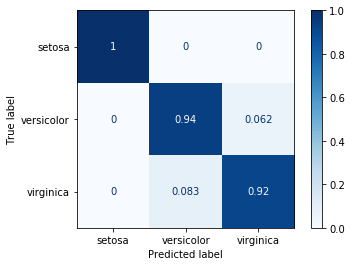

Rodada: 1 - seed: 5282 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.8333333333333334; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.83      0.91        18
   virginica       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



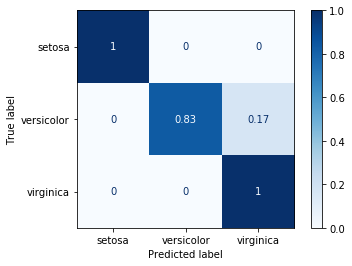

Rodada: 2 - seed: 6410 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8571428571428571; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.86      0.92         7

    accuracy                           0.98        45
   macro avg       0.98      0.95      0.96        45
weighted avg       0.98      0.98      0.98        45



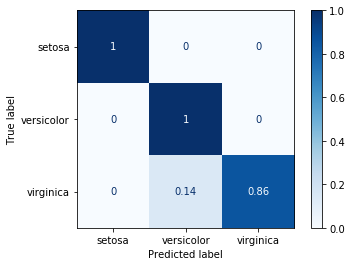

Rodada: 3 - seed: 1209 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9285714285714286; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.96        14
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



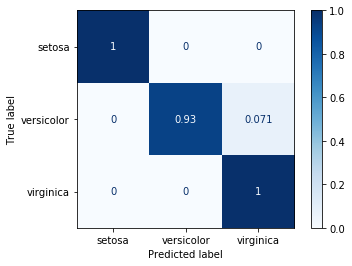

Rodada: 4 - seed: 3356 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.95; virginica: 0.8125; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.86      0.95      0.90        20
   virginica       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



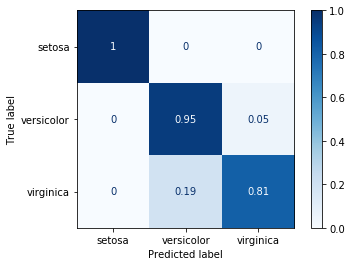

Rodada: 5 - seed: 3317 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.9523809523809523; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.95      0.98        21

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



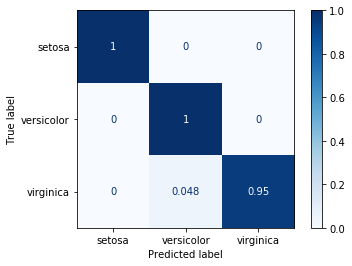

Rodada: 6 - seed: 658 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.97        15
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



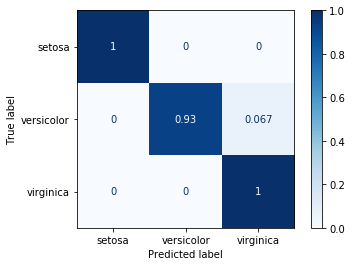

Rodada: 7 - seed: 5390 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.9333333333333333; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



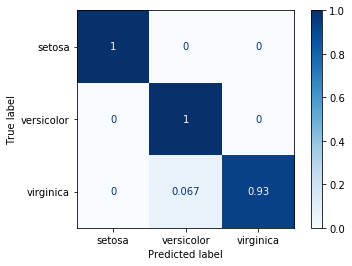

Rodada: 8 - seed: 3577 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.8; virginica: 0.95; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.89      0.80      0.84        10
   virginica       0.90      0.95      0.93        20

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



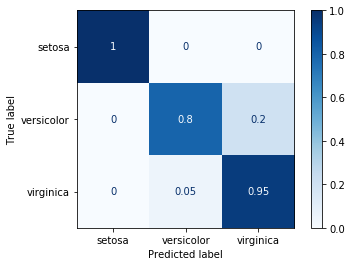

Rodada: 9 - seed: 823 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9285714285714286; virginica: 0.9411764705882353; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



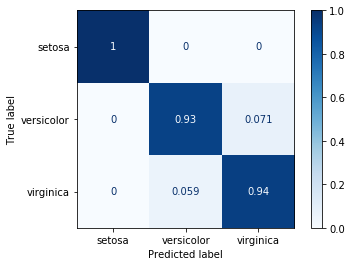

Rodada: 10 - seed: 4656 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.7857142857142857; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.79      0.88        14
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



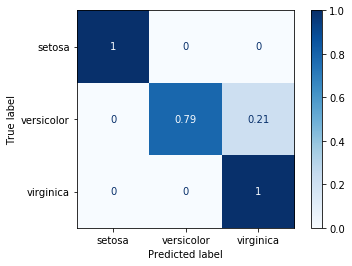

Rodada: 11 - seed: 4197 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9411764705882353; virginica: 0.9285714285714286; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        17
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



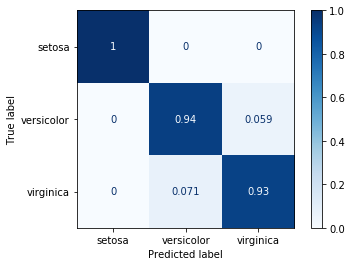

Rodada: 12 - seed: 5935 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9375; virginica: 0.875; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.88      0.94      0.91        16
   virginica       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



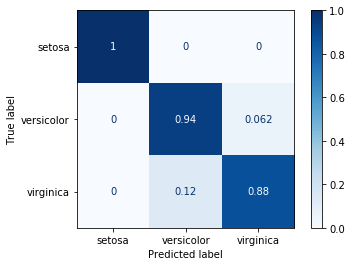

Rodada: 13 - seed: 1781 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8823529411764706; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



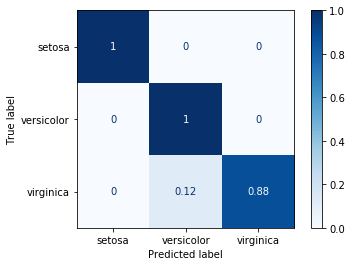

Rodada: 14 - seed: 5523 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.7692307692307693; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



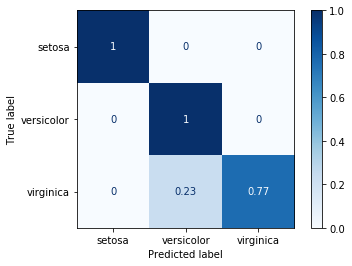

Rodada: 15 - seed: 8656 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8181818181818182; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.75      1.00      0.86        12
   virginica       1.00      0.82      0.90        22

    accuracy                           0.91        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.93      0.91      0.91        45



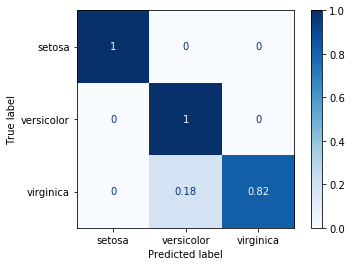

Rodada: 16 - seed: 3041 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 0.9230769230769231; virginica: 1.0; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.92      0.96        13
   virginica       0.95      1.00      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



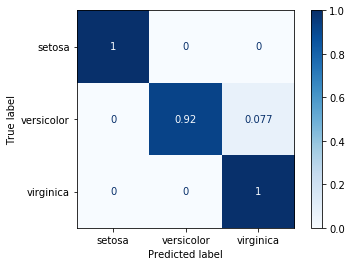

Rodada: 17 - seed: 5455 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.75; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.80      1.00      0.89        16
   virginica       1.00      0.75      0.86        16

    accuracy                           0.91        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



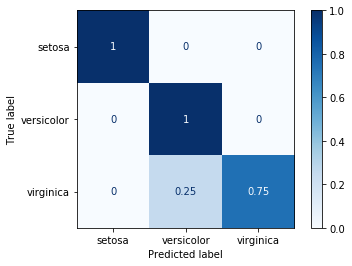

Rodada: 18 - seed: 4204 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8888888888888888; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



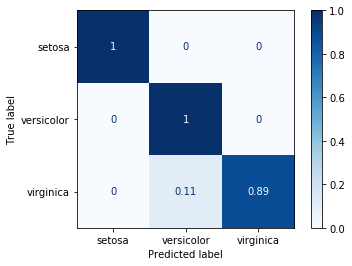

Rodada: 19 - seed: 1684 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.9166666666666666; virginica: 0.8235294117647058; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.79      0.92      0.85        12
   virginica       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



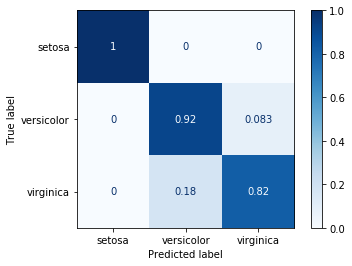

Rodada: 20 - seed: 2668 - acurácia: 0.9333333333333333

Sensibilidade [ setosa: 1.0; versicolor: 0.9375; virginica: 0.875; ]

              precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       0.88      0.94      0.91        16
   virginica       1.00      0.88      0.93        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



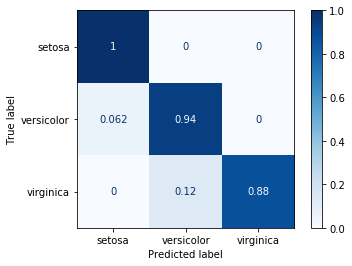

Rodada: 21 - seed: 4557 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.8823529411764706; virginica: 0.875; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88        17
   virginica       0.88      0.88      0.88        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



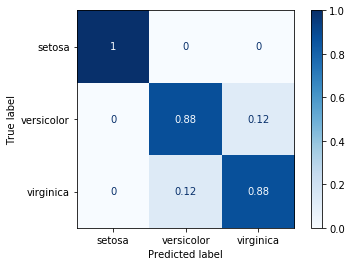

Rodada: 22 - seed: 409 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9333333333333333; virginica: 0.9230769230769231; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.93      0.93      0.93        15
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



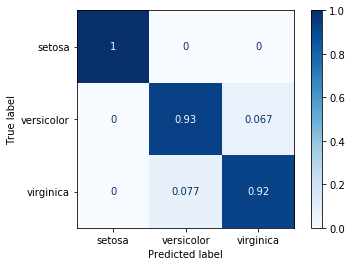

Rodada: 23 - seed: 3716 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 0.8; virginica: 0.9411764705882353; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      0.80      0.86        15
   virginica       0.84      0.94      0.89        17

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.91      0.91      0.91        45



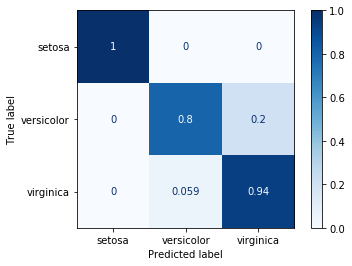

Rodada: 24 - seed: 8909 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8823529411764706; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



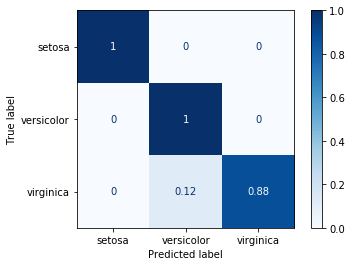

Rodada: 25 - seed: 3836 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.7777777777777778; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.78      0.88        18

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



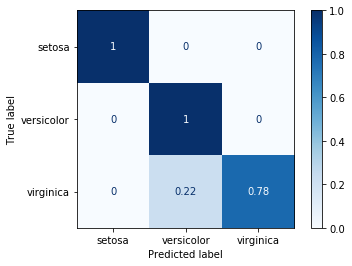

Rodada: 26 - seed: 2529 - acurácia: 0.9111111111111111

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.8181818181818182; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.69      1.00      0.82         9
   virginica       1.00      0.82      0.90        22

    accuracy                           0.91        45
   macro avg       0.90      0.94      0.91        45
weighted avg       0.94      0.91      0.91        45



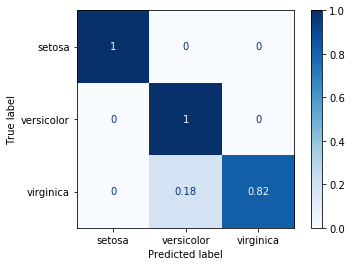

Rodada: 27 - seed: 6315 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9444444444444444; virginica: 0.9166666666666666; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



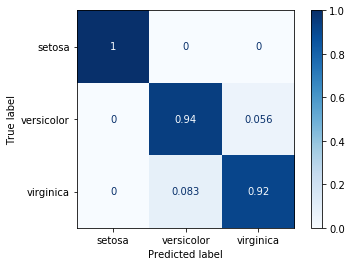

Rodada: 28 - seed: 4770 - acurácia: 0.9777777777777777

Sensibilidade [ setosa: 1.0; versicolor: 1.0; virginica: 0.9444444444444444; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



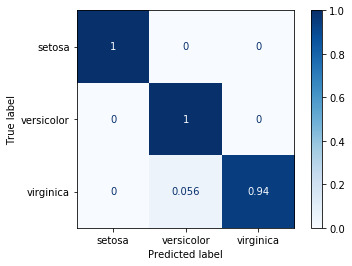

Rodada: 29 - seed: 2853 - acurácia: 0.9555555555555556

Sensibilidade [ setosa: 1.0; versicolor: 0.9285714285714286; virginica: 0.9333333333333333; ]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.93      0.93      0.93        14
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



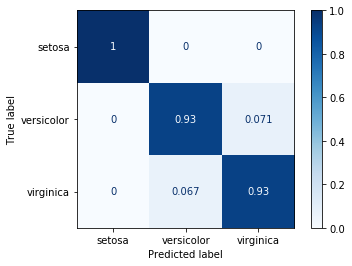

In [5]:
# Declarando listas para armazenar acurácia, sensibilidade, matriz de confusão e semente randomica de cada rodada
acc, rec, mat, sup = [], [], [], []
rodada = 0

# Gerando 30 sementes para distribuição dos dados
seed_list = np.random.randint(0, 9000, 30)

# 30 rodadas de classificação
for seed in seed_list:
    # Distribuindo os dados
    X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando Standard Scaler
    sc = StandardScaler().fit(X_pre_train)

    # Pré-processando dados
    X_train = sc.transform(X_pre_train)
    X_test = sc.transform(X_pre_test)

    # Instanciando e treinando classificador
    classifier = MLPClassifier(
        hidden_layer_sizes=best_hidden_layer_sizes,
        solver='lbfgs',
        activation='tanh'
    ).fit(
        X_train,
        y_train
    )

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Gerando resultados
    acuracia = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred, normalize='true')
    sensibilidade = recall_score(y_test, y_pred, average=None)
    setosa, versicolor, virginica = sensibilidade
    registro = classification_report(y_test, y_pred, target_names=irisDS.target_names, output_dict=True)

    # Adicionando resultados às respectivas listas
    acc.append(acuracia)
    rec.append(sensibilidade)
    mat.append(matrix)
    sup.append([registro[label]['support'] for label in irisDS.target_names])

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed} - acurácia: {acuracia}\n')

    print(f'Sensibilidade [ setosa: {setosa}; versicolor: {versicolor}; virginica: {virginica}; ]\n')

    print(classification_report(y_test, y_pred, target_names=irisDS.target_names))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        cmap=plt.cm.Blues,
        normalize='true',
        display_labels=irisDS.target_names
    )
    plt.show()
    rodada += 1

### Observando distribuição das classes nos grupos de teste 

In [6]:
splitDF = pd.DataFrame(data=sup, columns=irisDS.target_names)
splitDFdescribe = splitDF.describe()
splitDF['seed'] = seed_list
splitDF

,setosa,versicolor,virginica,seed
0,17,16,12,4887
1,15,18,12,5282
2,22,16,7,6410
3,17,14,14,1209
4,9,20,16,3356
5,14,10,21,3317
6,17,15,13,658
7,14,16,15,5390
8,15,10,20,3577
9,14,14,17,823


In [7]:
splitDFdescribe

,setosa,versicolor,virginica
count,30.000000,30.000000,30.000000
mean,14.733333,14.333333,15.933333
std,2.612085,2.720717,3.247634
min,9.000000,9.000000,7.000000
25%,13.000000,12.250000,14.000000
50%,14.500000,14.500000,16.000000
75%,16.000000,16.000000,17.750000
max,22.000000,20.000000,22.000000


### Observando Métricas de Acurácia e Sensibilidade

In [8]:
metricsDF = pd.DataFrame(data=rec, columns=[f'S - {classe}' for classe in irisDS.target_names])
metricsDF['Acurácia'] = acc
metricsDF

,S - setosa,S - versicolor,S - virginica,Acurácia
0,1.0,0.937500,0.916667,0.955556
1,1.0,0.833333,1.000000,0.933333
2,1.0,1.000000,0.857143,0.977778
3,1.0,0.928571,1.000000,0.977778
4,1.0,0.950000,0.812500,0.911111
5,1.0,1.000000,0.952381,0.977778
6,1.0,0.933333,1.000000,0.977778
7,1.0,1.000000,0.933333,0.977778
8,1.0,0.800000,0.950000,0.933333
9,1.0,0.928571,0.941176,0.955556


In [9]:
metricsDF.describe()

,S - setosa,S - versicolor,S - virginica,Acurácia
count,30.0,30.000000,30.000000,30.000000
mean,1.0,0.941388,0.899532,0.944444
std,0.0,0.064940,0.072068,0.025270
min,1.0,0.785714,0.750000,0.911111
25%,1.0,0.928571,0.861607,0.916667
50%,1.0,0.939338,0.916667,0.955556
75%,1.0,1.000000,0.943627,0.955556
max,1.0,1.000000,1.000000,0.977778


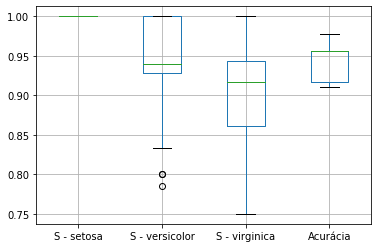

In [10]:
metricsDF.boxplot()